In [1]:
import numpy as np
import os
import re

root_dir = r"F:\benja\Bilayer RKKY\t=5nm_hystloop"

h_M_data = []
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    # Check if it's a folder and starts with "sim_Hext"
    if os.path.isdir(folder_path) and folder_name.startswith("sim_Hext"):

        # Extract the number after "sim_Hext"
        match = re.search(r"sim_Hext([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)", folder_name)
        if match:
            hext_value = float(match.group(1))

        m_last_path = os.path.join(folder_path, "output", "m_last.txt")
        if os.path.exists(m_last_path):
            
            with open(m_last_path, "r") as f:
                lines = f.readlines()

            # Parse magnetization components
            magnetization = []
            magnetization_x = []
            Ms_down = float(2e6)
            Ms_up = float(1.2e6)
            flag = True
            Ms = Ms_down
            
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 3:
                    mx, my, mz = [Ms * float(val) for val in parts]
                    if mx == float(0) and my == float(0) and mz == float(0):
                        Ms = Ms_up
                    if mx!= float(0) and my!= float(0) and mz!= float(0):
                        magnetization.append((mx, my, mz))
                        magnetization_x.append(mx)
                    else: 
                        flag = False
                    
            N = len(magnetization)
            
            M_field = (1/N) * np.sum(magnetization_x)
            h_M_data.append((hext_value, M_field))

root_dir = r"F:\Tesisti\Ferri\Benjamin\hyst_loop2_2ndbranch"

h_M_data2 = []
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    # Check if it's a folder and starts with "sim_Hext"
    if os.path.isdir(folder_path) and folder_name.startswith("sim_Hext"):

        # Extract the number after "sim_Hext"
        match = re.search(r"sim_Hext([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)", folder_name)
        if match:
            hext_value = float(match.group(1))

        m_last_path = os.path.join(folder_path, "output", "m_last.txt")
        if os.path.exists(m_last_path):
            
            with open(m_last_path, "r") as f:
                lines = f.readlines()

            # Parse magnetization components
            magnetization = []
            magnetization_x = []
            Ms_down = float(2e6)
            Ms_up = float(1.2e6)
            flag = True
            Ms = Ms_down
            
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 3:
                    mx, my, mz = [Ms * float(val) for val in parts]
                    if mx == float(0) and my == float(0) and mz == float(0):
                        Ms = Ms_up
                    if mx!= float(0) or my!= float(0) or mz!= float(0):
                        magnetization.append((mx, my, mz))
                        magnetization_x.append(mx)
                    else: 
                        flag = False
                    
            N = len(magnetization)
            
            M_field = (1/N) * np.sum(magnetization_x)
            h_M_data2.append((hext_value, M_field))


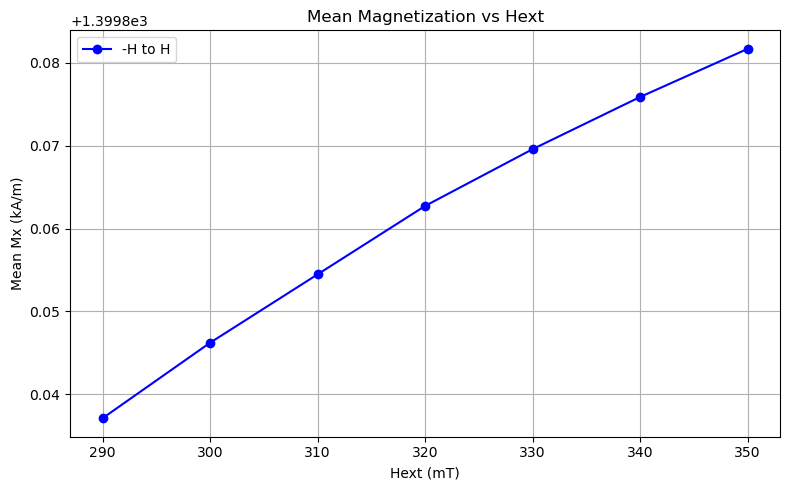

In [3]:
import matplotlib.pyplot as plt

# Example h_M_data structure:
# h_M_data = [(H1, [Mx1, My1, Mz1]), (H2, [Mx2, My2, Mz2]), ...]
h_M_data.sort(key=lambda x: x[0])

# Extract Hext and Mz values
H_values = np.array([item[0] for item in h_M_data])
Mx_values = np.array([item[1] for item in h_M_data])

# H_values2 = np.array([item[0] for item in h_M_data2])
# Mx_values2 = np.array([item[1] for item in h_M_data2] )
# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(H_values, 1e-3*Mx_values, 'o-' ,color='blue', label='-H to H')
# plt.scatter(H_values2, 1e-3*Mx_values2, color='red', label='H to -H')
plt.xlabel("Hext (mT)")
plt.ylabel("Mean Mx (kA/m)")
#plt.xlim(-1100, 0)
#plt.ylim(-1,.001)
plt.title("Mean Magnetization vs Hext")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
Mx_values

array([1399837.11225286, 1399846.22196511, 1399854.47490299,
       1399862.73423539, 1399869.58659557, 1399875.88615599,
       1399881.69291776])